In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
import matplotlib.mlab as mlab
import matplotlib
%matplotlib inline
import math

matplotlib.rc('font', size=16)

np.random.seed(387)

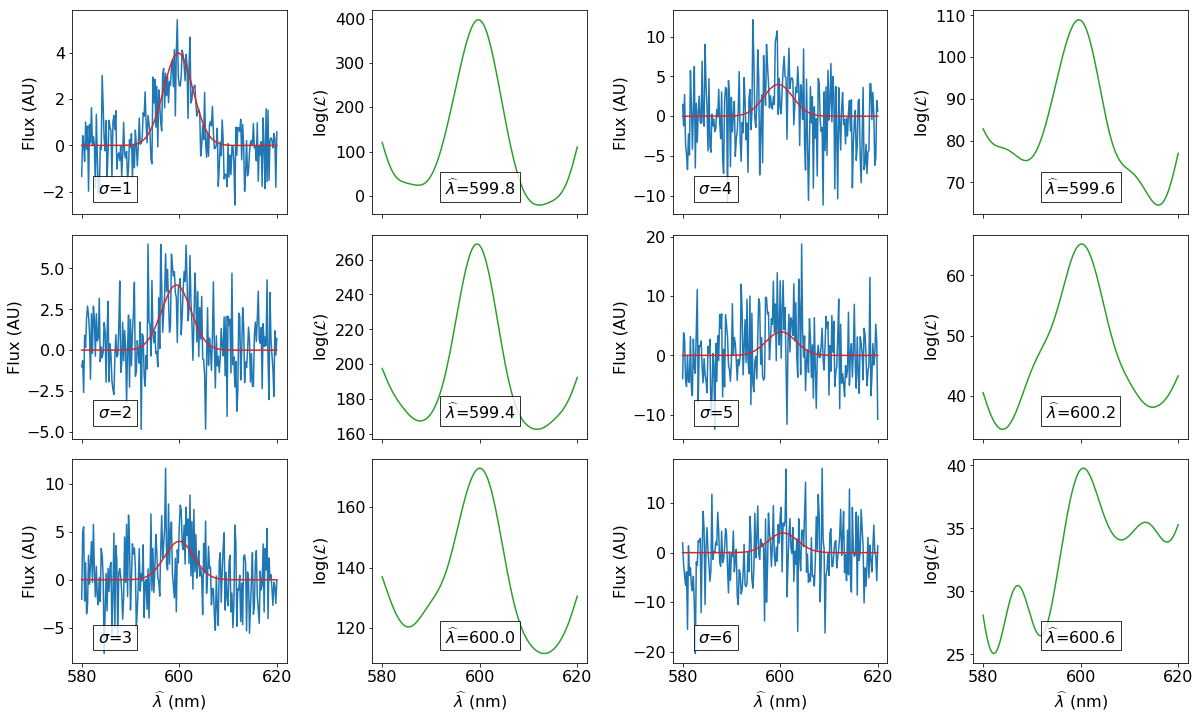

In [2]:
sigma = 3
mu = 600
area = 30

x = np.linspace(580, 620, 201)
y = mlab.normpdf(x, mu, sigma) * area

def model(mu):
    return mlab.normpdf(x, mu, sigma) * area

def likelihood(Y, mu, noise):
    m = model(mu)
    #return np.sum(Y - m)**2 / (2 * noise**2)
    n = len(Y)
    return np.log((area/noise)**n * (2*np.pi)**(-n/2) * np.exp(-np.sum((Y-m)**2)/(2 * noise**2)))

N = 6

L = np.zeros((N, len(x)))
y_noise = np.zeros((N,len(x)))
estimates = np.zeros(N)
best_L = np.zeros(N)

for n in range(N):
    y_noise[n] = y + np.random.normal(0, n+1, size=len(x))
    for i, mu in enumerate(x):
        L[n, i] = likelihood(y_noise[n], mu, n+1)
    best_L[n] = np.max(L[n])
    estimates[n] = x[np.argmax(L[n])]

fig, axs = plt.subplots(ncols=4, nrows=N//2, figsize=(5*4,4*(N/2)),
                        sharex='col', gridspec_kw={'wspace':0.4,'hspace':0.1})

annot_bbox = {'boxstyle':'square','ec':'black','fc':'white','alpha':0.8}
for i, ax_row in enumerate(axs):
    i2 = i + (N // 2)
    ax_row[0].plot(x, y_noise[i])
    ax_row[0].plot(x, model(estimates[i]), c='tab:red')
    ax_row[0].set_ylabel('Flux (AU)')
    ax_row[0].annotate(r'$\sigma$={}'.format(i+1), xy=(0.2,0.1), xycoords='axes fraction',
                       ha='center', bbox=annot_bbox)
    ax_row[1].plot(x, L[i], c='tab:green')
    ax_row[1].set_ylabel(r'$\log(\mathcal{L})$')
    ax_row[1].annotate(r'$\widehat{{\lambda}}$={}'.format(estimates[i]), xy=(0.5,0.1),
                       ha='center', xycoords='axes fraction', bbox=annot_bbox)
    ax_row[2].plot(x, y_noise[i2])
    ax_row[2].plot(x, model(estimates[i2]), c='tab:red')
    ax_row[2].set_ylabel('Flux (AU)')
    ax_row[2].annotate(r'$\sigma$={}'.format(i2+1), xy=(0.2,0.1), xycoords='axes fraction',
                       ha='center', bbox=annot_bbox)
    ax_row[3].plot(x, L[i2], c='tab:green')
    ax_row[3].set_ylabel(r'$\log(\mathcal{L})$')
    ax_row[3].annotate(r'$\widehat{{\lambda}}$={}'.format(estimates[i2]), xy=(0.5,0.1),
                       ha='center', xycoords='axes fraction', bbox=annot_bbox)
    if i == (N-1)//2:
        [ax_row[j].set_xlabel(r'$\widehat{\lambda}$ (nm)') for j in range(4)]
    plt.savefig('vary_noise.pdf')

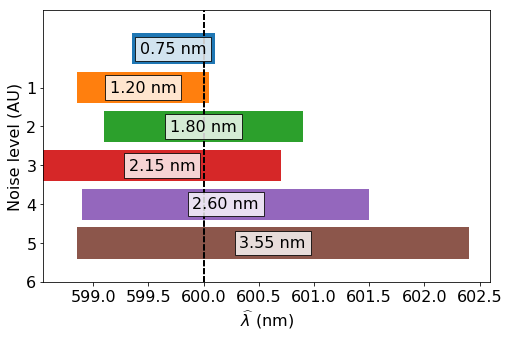

In [3]:
lims = np.zeros((N, 2))

plt.figure(figsize=(8,5))
#plt.xlim(598, 602)
plt.ylim(6, -1)
plt.yticks(list(range(1,N+1)))
plt.xlabel(r'$\widehat{\lambda}$ (nm)')
plt.ylabel(r'Noise level (AU)')

for n in range(N):
    # work backwards
    deltaL = 0
    test = estimates[n]
    while deltaL < 1:
        test -= 0.05
        testL = likelihood(y_noise[n], test, n+1)
        deltaL = np.abs(best_L[n] - testL)
    mu_min = test
    # work forwards
    deltaL = 0
    test = estimates[n]
    while deltaL < 1:
        test += 0.05
        testL = likelihood(y_noise[n], test, n+1)
        deltaL = np.abs(best_L[n] - testL)
    mu_max = test
    
    lims[n] = [mu_min, mu_max]
    
    s = np.logical_and(x>mu_min, x<mu_max)
    
    plt.plot(x[s], np.full_like(x[s], n))
    plt.barh(y=n, width=mu_max-mu_min, left=mu_min)
    plt.axvline(600, c='k', ls='--')
    plt.annotate('{:.2f} nm'.format(mu_max-mu_min),
                 xy=(mu_min+(mu_max-mu_min)/2,n), xycoords='data',
                ha='center', va='center', bbox=annot_bbox)
    plt.savefig('vary_noise_uncertainties.pdf')

In [4]:
Ntests = 2000

L = np.zeros(len(x))
estimates=np.zeros(Ntests)

for n in range(Ntests):
    y_noise = y + np.random.normal(0, 1, size=len(x))
    for i, mu in enumerate(x):
        L[i] = likelihood(y_noise, mu, 1)
    best_L = np.max(L)
    estimates[n] = x[np.argmax(L)]
    if n%100==0:
        print(n)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


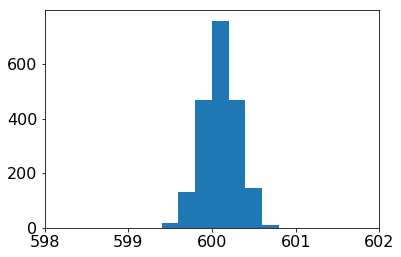

In [5]:
plt.xlim(598, 602)
plt.hist(estimates, bins=x);